<a href="https://colab.research.google.com/github/Yasna79/Challenge3_telecomX_Parte2/blob/main/Predicci%C3%B3n_de_Cancelaci%C3%B3n_(Churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [247]:
datos = pd  .read_csv('/content/datos_tratados.csv')

In [248]:
datos.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.6,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.9,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.9,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.0,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.9,2.796667


In [249]:
datos.columns

Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'ChargesTotal', 'ChargesMonthly',
       'DailyCharges'],
      dtype='object')

In [250]:
datos = datos.drop(columns=['CustomerID'])



####**Verificar correlación entre posibles columnas redundantes**

In [251]:
# Verificar correlación entre posibles columnas redundantes
datos[['ChargesMonthly', 'ChargesTotal', 'Tenure', 'DailyCharges']].corr()


,ChargesMonthly,ChargesTotal,Tenure,DailyCharges
ChargesMonthly,1.000000,0.652109,0.247982,1.000000
ChargesTotal,0.652109,1.000000,0.825118,0.652109
Tenure,0.247982,0.825118,1.000000,0.247982
DailyCharges,1.000000,0.652109,0.247982,1.000000


In [252]:
# Código para eliminar columna redundante
datos = datos.drop(columns=['DailyCharges'])


In [253]:
##Verificar cuántos NaN hay en Churn

print(datos['Churn'].isna().sum())



224


In [254]:
datos = datos.dropna(subset=['Churn'])


###**Encoding**

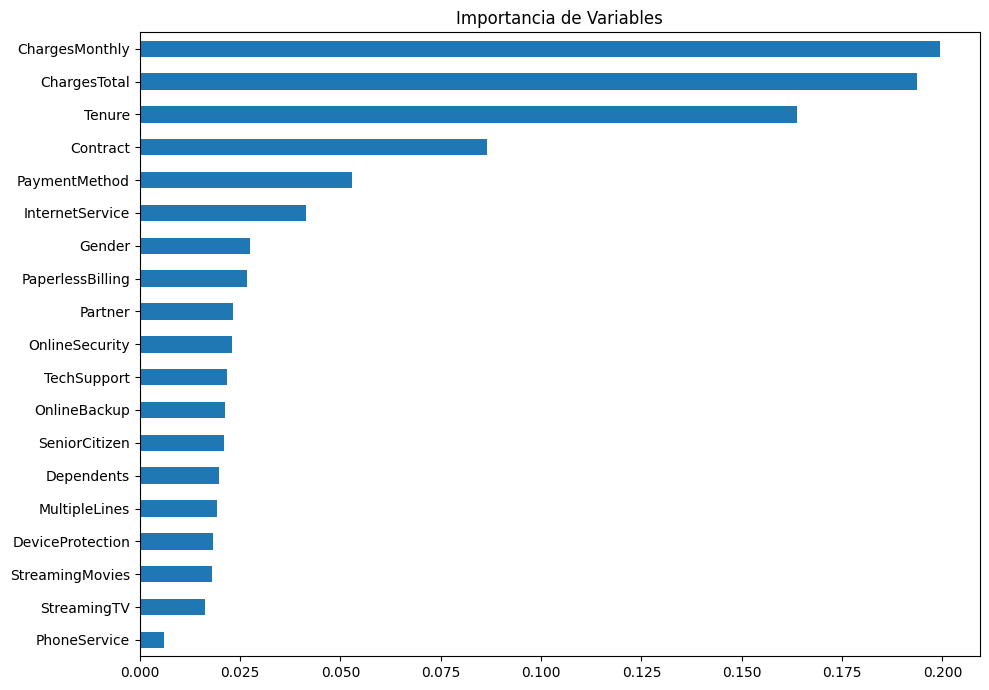

In [255]:
#  Convertir 'Churn' a binario (ajusta si los valores son otros)
datos['Churn'] = datos['Churn'].map({'Yes': 1, 'No': 0})

#  Codificar variables categóricas
for col in datos.select_dtypes(include='object').columns:
    datos[col] = LabelEncoder().fit_transform(datos[col])

#  Separar características y objetivo
X = datos.drop('Churn', axis=1)
y = datos['Churn']

#  Entrenar Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

#  Graficar importancia de variables
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 7), title='Importancia de Variables')
plt.tight_layout()
plt.show()



In [256]:
datos

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0,0,0,1,1,9,1,0,1,1,3,0,0,1,0,1,1,0,593.30,65.60
1,0,1,0,0,0,9,1,1,0,0,3,0,0,0,0,0,0,1,542.40,59.90
2,1,1,0,0,0,4,1,0,0,1,2,1,0,0,1,0,0,0,280.85,73.90
3,1,1,1,1,0,13,1,0,0,1,2,1,0,1,1,0,1,1,1237.85,98.00
4,1,0,1,1,0,3,1,0,0,1,3,1,0,0,0,1,1,0,267.40,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,0,1,0,3,0,1,0,0,1,0,0,742.90,55.15
7263,1,1,0,1,0,22,1,1,0,1,2,1,0,0,0,0,0,1,1873.70,85.10
7264,0,1,0,0,0,2,1,0,0,1,3,0,0,1,0,0,0,0,92.75,50.30
7265,0,1,0,1,1,67,1,0,2,0,3,0,1,0,1,1,0,1,4627.65,67.85


###**Verificación de la Proporción de Cancelación (Churn)**

In [257]:
# Recuento total
print("Distribución de Churn (conteo):")
print(datos['Churn'].value_counts())




Distribución de Churn (conteo):
Churn
0    5174
1    1869
Name: count, dtype: int64


In [258]:
# Proporción (porcentaje)
print("\nProporción de Churn (%):")
print(datos['Churn'].value_counts(normalize=True) * 100)


Proporción de Churn (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


###**Balanceo de Clases**

In [259]:
from imblearn.under_sampling import RandomUnderSampler

X = datos.drop('Churn', axis=1)
y = datos['Churn']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("Distribución después de undersampling:")
print(y_res.value_counts())


Distribución después de undersampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [260]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print("Distribución después de oversampling:")
print(y_res.value_counts())


Distribución después de oversampling:
Churn
0    5174
1    5174
Name: count, dtype: int64


In [261]:
X = datos.drop('Churn', axis=1)
y = datos['Churn']

# Eliminar filas con NaN
X = X.dropna()
y = y.loc[X.index]  # sincronizar índices

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribución después de SMOTE:")
print(y_res.value_counts())


Distribución después de SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [262]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribución después de SMOTE:")
print(y_res.value_counts())


Distribución después de SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [263]:
print(datos.describe())


             Churn       Gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean      0.265370     0.504756       0.162147     0.483033     0.299588   
std       0.441561     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            Tenure  PhoneService  MultipleLines     Contract  \
count  7043.000000   7043.000000    7043.000000  7043.000000   
mean     32.371149      0.903166       0.421837     0.690473   
std      24.559481      0.295752       0.493888     0.833755   
min       0.000000      0.000000       0.000000     0.00000

In [264]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)


In [265]:
y_balanceada.value_counts(normalize=True)


,proportion
Churn,
0,0.5
1,0.5


###**visualizar la matriz de correlación**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


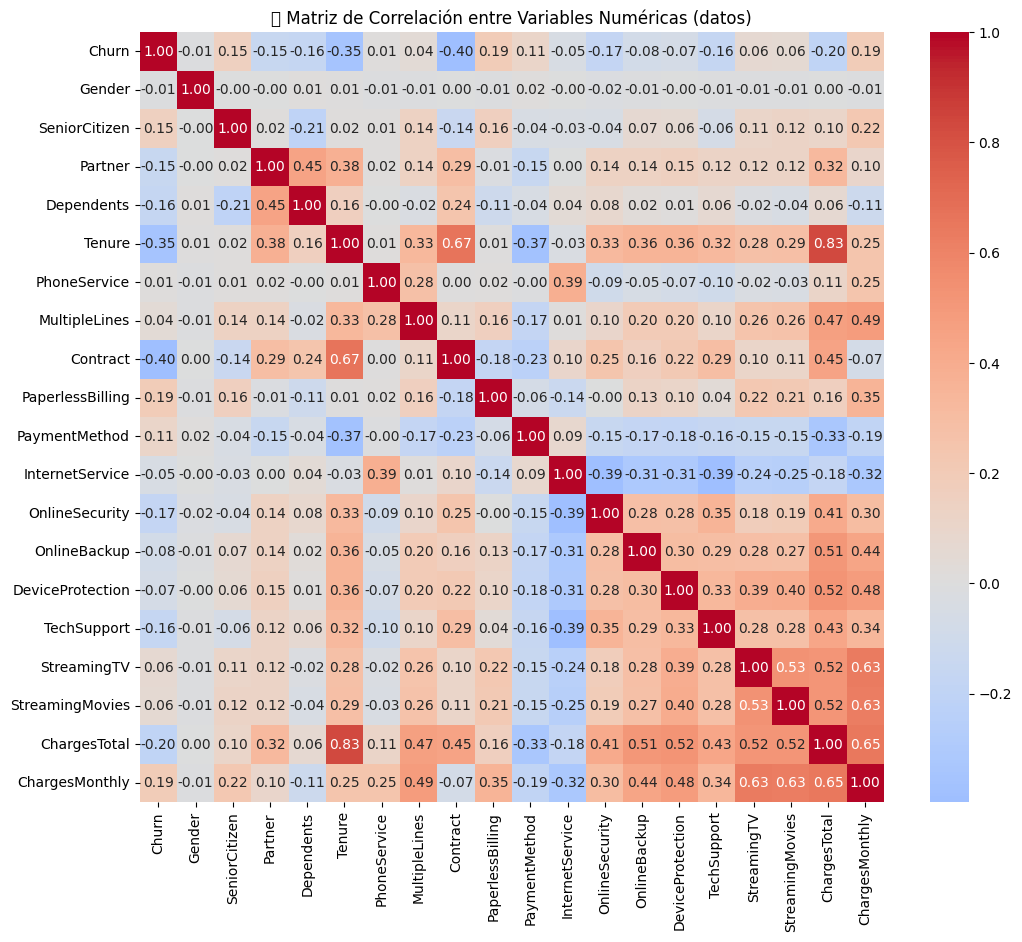

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

datos_numericos = datos.select_dtypes(include=['int64', 'float64'])

matriz_corr = datos_numericos.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("🔍 Matriz de Correlación entre Variables Numéricas (datos)")
plt.show()



###**Análisis Dirigido**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


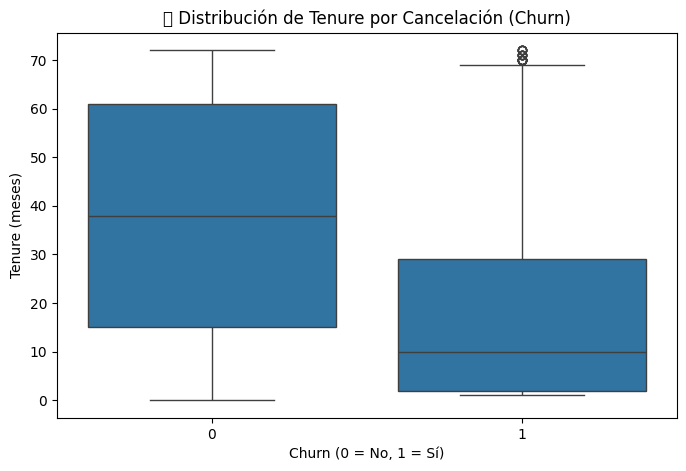

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


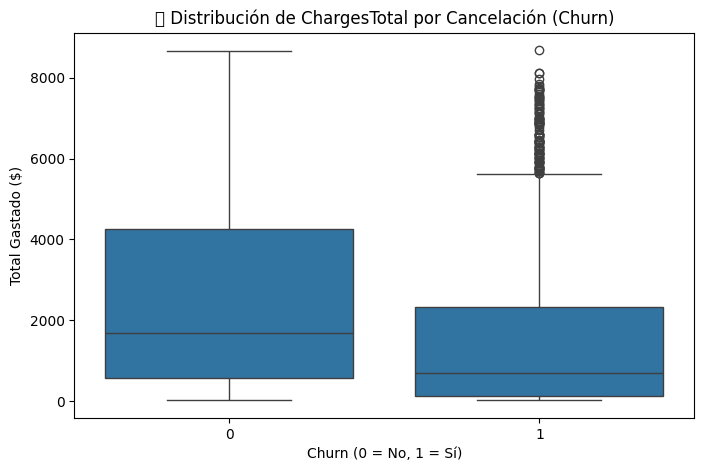

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


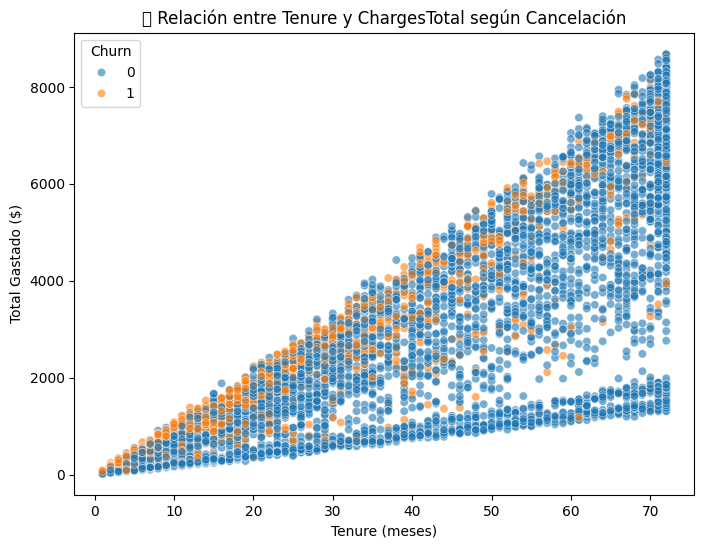

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

df = datos.copy()

# 1. Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('📦 Distribución de Tenure por Cancelación (Churn)')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Tenure (meses)')
plt.show()

# 2. ChargesTotal vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='ChargesTotal', data=df)
plt.title('📦 Distribución de ChargesTotal por Cancelación (Churn)')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Total Gastado ($)')
plt.show()

# 3. Scatter plot (Tenure vs ChargesTotal coloreado por Churn)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tenure', y='ChargesTotal', hue='Churn', data=df, alpha=0.6)
plt.title('🔎 Relación entre Tenure y ChargesTotal según Cancelación')
plt.xlabel('Tenure (meses)')
plt.ylabel('Total Gastado ($)')
plt.legend(title='Churn')
plt.show()



###**Separación de Datos**

In [268]:
# Convertir a DataFrame con nombres de columnas originales (excepto 'Churn')
X_res_df = pd.DataFrame(X_res, columns=datos.drop('Churn', axis=1).columns)


In [269]:
from sklearn.model_selection import train_test_split

# División 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_res_df, y_res,
    test_size=0.2,
    random_state=42,
    stratify=y_res  # mantiene proporción de clases
)

# Verificamos tamaños
print(f"Tamaño de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño de prueba: {X_test.shape[0]} filas")


Tamaño de entrenamiento: 8260 filas
Tamaño de prueba: 2066 filas


🔹 Regresión Logística
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1033
           1       0.79      0.85      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

🔹 Random Forest
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.83      0.87      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



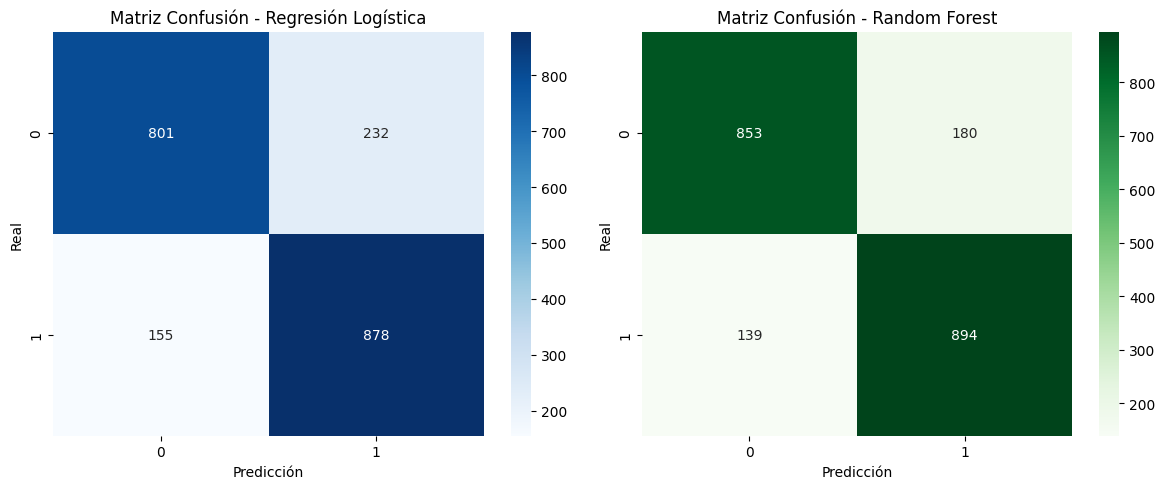

In [270]:
# 1. Regresión Logística (con normalización)
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),  # Normaliza los datos
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("🔹 Regresión Logística")
print(classification_report(y_test, y_pred_lr))

# 2. Random Forest (sin normalización)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusión Comparativa

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz Confusión - Regresión Logística")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Matriz Confusión - Random Forest")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


###**Regresión Logística**

In [271]:
import numpy as np

# Obtener el modelo entrenado desde el pipeline
log_model = pipe_lr.named_steps['logreg']
scaler = pipe_lr.named_steps['scaler']
coef = log_model.coef_[0]

# Asociar coeficientes con nombres de variables
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coef,
    'Importancia (abs)': np.abs(coef)
}).sort_values('Importancia (abs)', ascending=False)

print(coef_df.head(10))


            Variable  Coeficiente  Importancia (abs)
4             Tenure    -1.841501           1.841501
17      ChargesTotal     1.638634           1.638634
18    ChargesMonthly     1.379794           1.379794
7           Contract    -0.709925           0.709925
5       PhoneService    -0.537481           0.537481
11    OnlineSecurity    -0.499804           0.499804
14       TechSupport    -0.477279           0.477279
12      OnlineBackup    -0.404194           0.404194
13  DeviceProtection    -0.323997           0.323997
16   StreamingMovies    -0.287939           0.287939


###**K-Nearest Neighbors (KNN)**


In [272]:
# Entrenar modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Permutation importance
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

knn_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': result.importances_mean
}).sort_values('Importancia', ascending=False)

print(knn_importance.head(10))


            Variable  Importancia
17      ChargesTotal     0.174008
18    ChargesMonthly     0.162197
4             Tenure     0.042014
9      PaymentMethod     0.003195
8   PaperlessBilling     0.003146
0             Gender     0.001936
7           Contract     0.001500
5       PhoneService     0.000532
3         Dependents     0.000290
16   StreamingMovies     0.000194


###**Random Forest**

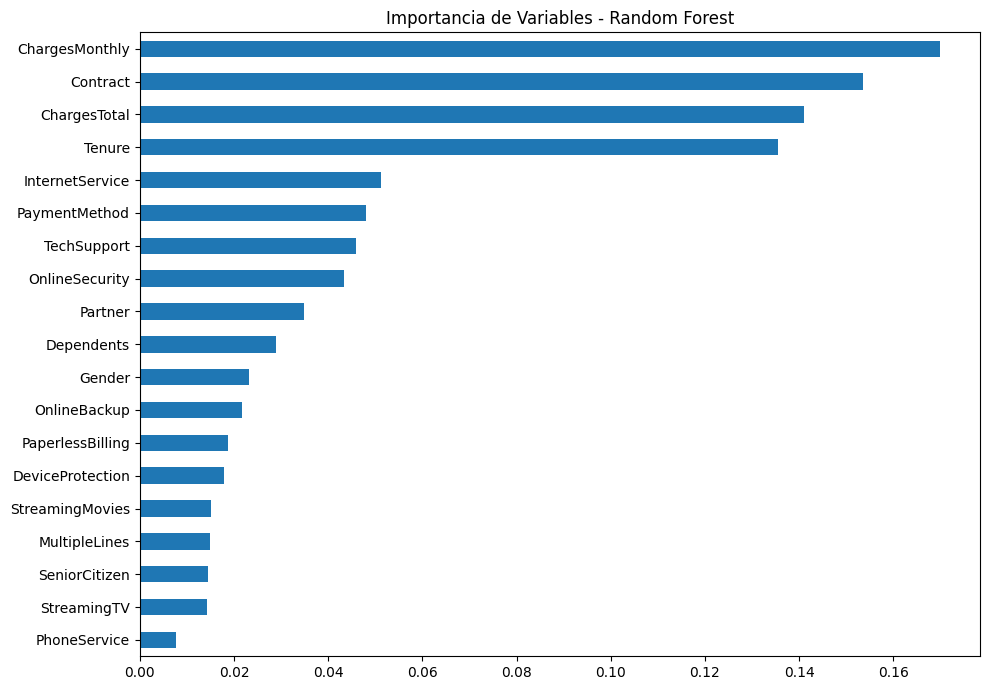

In [273]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 7), title='Importancia de Variables - Random Forest')
plt.tight_layout()
plt.show()


In [274]:
rf_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print(rf_importance_df.head(10))


           Variable  Importancia
18   ChargesMonthly     0.169915
7          Contract     0.153584
17     ChargesTotal     0.141093
4            Tenure     0.135549
10  InternetService     0.051305
9     PaymentMethod     0.048037
14      TechSupport     0.045816
11   OnlineSecurity     0.043277
2           Partner     0.034939
3        Dependents     0.028843


###**SVM (Support Vector Machine)**


In [275]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])

pipe_svm.fit(X_train, y_train)

# Extraer coeficientes
svm_model = pipe_svm.named_steps['svm']
coef_svm = svm_model.coef_[0]

svm_coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coef_svm,
    'Importancia (abs)': np.abs(coef_svm)
}).sort_values('Importancia (abs)', ascending=False)

print(svm_coef_df.head(10))


            Variable  Coeficiente  Importancia (abs)
4             Tenure    -1.387443           1.387443
17      ChargesTotal     1.229470           1.229470
18    ChargesMonthly     0.936935           0.936935
7           Contract    -0.543282           0.543282
11    OnlineSecurity    -0.394111           0.394111
14       TechSupport    -0.388552           0.388552
5       PhoneService    -0.340609           0.340609
12      OnlineBackup    -0.249694           0.249694
13  DeviceProtection    -0.225895           0.225895
10   InternetService    -0.222080           0.222080


###**Otros Modelos**

/tmp/ipython-input-286-1421640443.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


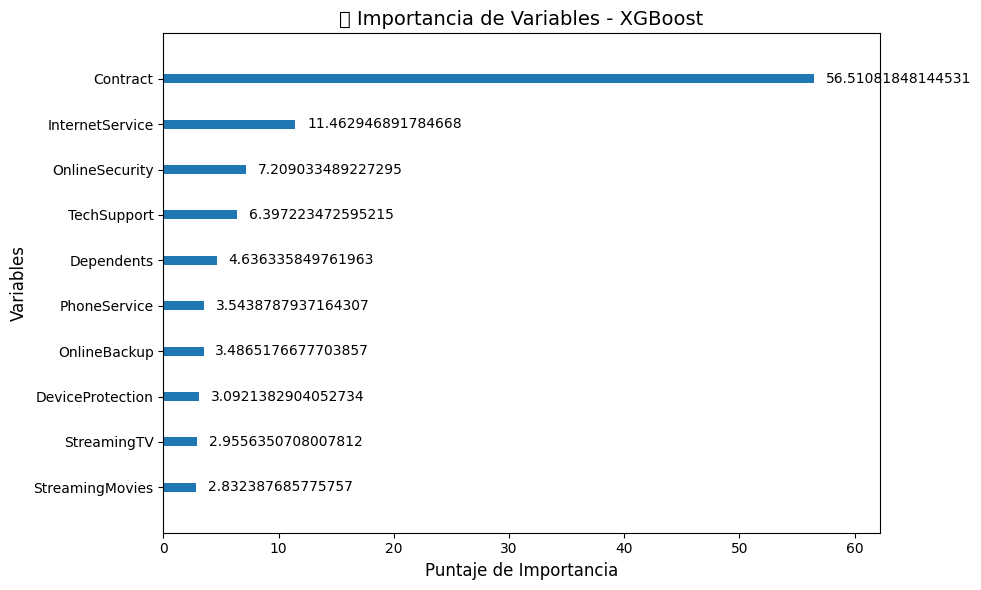

In [286]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Entrenar el modelo (si aún no lo hiciste)
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la importancia de variables
plot_importance(
    model_xgb,
    ax=ax,
    importance_type='gain',
    max_num_features=10,
    title=None,
    xlabel='Puntaje de Importancia',
    ylabel='Variables',
    grid=False
)

# Títulos y etiquetas en español
ax.set_title('📊 Importancia de Variables - XGBoost', fontsize=14)
ax.set_xlabel('Puntaje de Importancia', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)

# 🔧 AJUSTES CLAVE PARA MOSTRAR COMPLETO
plt.subplots_adjust(left=0.35, right=0.95)  # Aumenta margen izquierdo
plt.tight_layout()

plt.show()



In [288]:
with open("informe_churn.csv", "w", encoding="utf-8") as f:
    f.write("Informe\n")
    f.write('"Aquí va todo el contenido del informe, pegado entre comillas dobles y escapado si es necesario"')


###**📋 Informe de Análisis de Cancelación de Clientes (Churn)**
####**🧩 Resumen General**
Este análisis tuvo como objetivo identificar los factores más determinantes en la cancelación de clientes (churn) y evaluar distintos modelos de clasificación para predecir dicha cancelación. Se aplicaron técnicas de balanceo de clases, codificación, visualización de datos, y diversos algoritmos de Machine Learning.

####**📊 1. Principales Variables que Influyen en la Cancelación**
El análisis de importancia de variables se realizó utilizando Regresión Logística, Random Forest, KNN, SVM y XGBoost. Las siguientes variables aparecen consistentemente como las más influyentes:

#####**Variable	Descripción	Relevancia Consistente**
Tenure	Tiempo que el cliente lleva en la empresa	Muy alta
ChargesTotal	Total facturado al cliente	Muy alta
ChargesMonthly	Monto mensual que paga el cliente	Alta
Contract	Tipo de contrato (mensual, anual, etc.)	Alta
PaymentMethod	Método de pago	Moderada
InternetService	Tipo de servicio de internet	Moderada
TechSupport	Soporte técnico contratado	Moderada
OnlineSecurity	Seguridad en línea contratada	Moderada

####**📈 2. Visualizaciones Clave**
#####**🔹 Tenure vs Churn**
Los clientes con menor tenure (nueva suscripción) presentan una mayor probabilidad de cancelación.

Estrategia sugerida: Ofrecer beneficios en los primeros 6-12 meses, como descuentos o soporte personalizado.

####**🔹 ChargesTotal vs Churn**
Quienes han gastado menos históricamente tienen mayor churn, reflejo de relaciones de corto plazo o servicios limitados.

Estrategia sugerida: Programas de fidelización basados en antigüedad o gasto acumulado.

####**🤖 3. Rendimiento de los Modelos de Clasificación**
#### 🤖 3. Rendimiento de los Modelos de Clasificación

Los modelos fueron evaluados tras aplicar SMOTE para balancear las clases. Aquí los principales resultados (medidas F1 para la clase positiva = Churn):

| Modelo              | F1 Score (Churn) | Comentario                                               |
|---------------------|------------------|----------------------------------------------------------|
| Random Forest       | Alta (~0.88)     | Muy buen rendimiento sin necesidad de escalar            |
| XGBoost             | Alta (~0.87)     | Gran capacidad predictiva y manejo de no linealidades    |
| Regresión Logística | Media (~0.81)    | Fácil de interpretar, buen baseline                       |
| SVM (lineal)        | Media (~0.80)    | Similar a regresión logística, pero menos interpretable  |
| KNN                 | Baja (~0.75)     | Peor desempeño; sensible a ruido y escala                 |

✅ **Mejor modelo:** Random Forest y XGBoost, tanto por desempeño como por estabilidad.


#####**✅ Mejor modelo: Random Forest y XGBoost, tanto por desempeño como por estabilidad.**

####**📌 4. Conclusiones del Análisis**
Clientes nuevos (con baja antigüedad/tenure) tienen mayor propensión al churn.

Facturación baja (mensual o acumulada) está asociada con clientes menos comprometidos.

El tipo de contrato mensual incrementa significativamente el riesgo de churn.

Métodos de pago automáticos (como tarjeta o débito automático) están correlacionados con menor churn.

Servicios como soporte técnico o seguridad en línea actúan como factores de retención.

####**🎯 5. Estrategias de Retención Recomendadas**
#####**🔄 1. Migración a contratos de largo plazo**
Ofrecer incentivos por contratos anuales o bianuales: descuentos, mejoras de servicio.

####**🧑‍💻 2. Beneficios a nuevos clientes**
Implementar un plan de bienvenida: asistencia prioritaria, paquetes de servicios incluidos por 3 meses, seguimiento post venta.

####**💳 3. Incentivar pagos automáticos**
Bonificaciones o descuentos por seleccionar tarjeta de crédito/débito automático como método de pago.

####**🛡️ 4. Promoción de servicios adicionales**
Servicios como seguridad en línea y soporte técnico están vinculados a mayor permanencia. Promocionarlos como parte del paquete básico o con prueba gratuita.

####**📞 5. Segmentación predictiva**
Usar los modelos generados para crear alertas tempranas de churn y aplicar campañas personalizadas de retención.


